<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/SVMNonLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from gensim import parsing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import chardet

In [7]:
with open('setdata.csv', 'rb') as f:
  result = chardet.detect(f.read())

df = pd.read_csv('setdata.csv', encoding = result['encoding'])

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df['v1'] = df.v1.map({'ham':0, 'spam':1})
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
df.v1.value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [14]:
import plotly.offline as py
import plotly.graph_objs as go

random_color = list(np.random.choice(range(255), size=3))

species_count = df['v1'].value_counts()
dfp = [go.Bar(
    x = species_count.index,
    y = species_count.values,
    marker = dict(color = random_color)
)]

py.iplot(dfp)

In [15]:
def parse(s):
  parsing.stem_text(s)
  return s

for i in range(0, len(df)):
  df.iloc[i,1] = parse(df.iloc[i,1])
  df.iloc[i,1] = df.iloc[i,1].lower()
X,y = df['v2'].tolist(), df['v1'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SVC(kernel = 'poly'))])

In [18]:
text_clf

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', SVC(kernel='poly'))])

In [22]:
text_clf.fit(X_train, y_train)

y_red = text_clf.predict(X_test)
y_red

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
print("Akurasi Skor : ", accuracy_score(y_test, y_red))

Akurasi Skor :  0.9363228699551569


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       959
           1       1.00      0.54      0.71       156

    accuracy                           0.94      1115
   macro avg       0.97      0.77      0.83      1115
weighted avg       0.94      0.94      0.93      1115



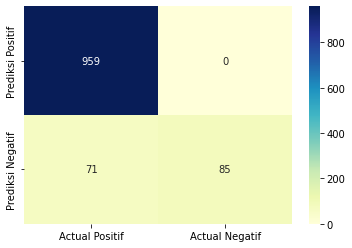

In [29]:
cm = confusion_matrix(y_test, y_red)

print(classification_report(y_test, y_red))

import seaborn as sns

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positif', 'Actual Negatif'],
                                    index = ['Prediksi Positif', 'Prediksi Negatif'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [31]:
random_probs = [0 for _ in range(len(y_test))]
svm_probs = text_clf.predict(X_test)
svm_probs

array([0, 0, 1, ..., 0, 0, 0])

In [33]:
random_auc = roc_auc_score(y_test, random_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('SVM = %.3f' % (svm_auc))

Random Prediction : AUCROC = 0.500
SVM = 0.772


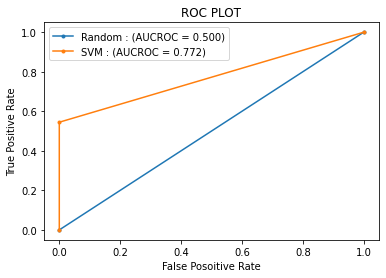

In [34]:
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

import matplotlib.pyplot as plt
plt.plot(random_fpr, random_tpr, marker=".", label = "Random : (AUCROC = %.3f)" % random_auc)
plt.plot(svm_fpr, svm_tpr, marker=".", label = "SVM : (AUCROC = %.3f)" % svm_auc)

plt.title("ROC PLOT")
plt.xlabel("False Posoitive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()